<a href="https://colab.research.google.com/github/Imshyeon/2023_AI_BACKEND_AI/blob/master/Deep%20Learning/DNN_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.13.0'

In [3]:
tf.test.gpu_device_name()

''

# Boston_Housing Data_Set Load & Review

In [4]:
from tensorflow.keras.datasets import boston_housing

(X_train,y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [5]:
print(X_train.shape)
print(X_test.shape)

print(y_train[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# Data Preprocessing

In [6]:
mean = X_train.mean(axis=0)
std = X_train.std(axis = 0)

X_train = X_train - mean
X_train = X_train / std

X_test = X_test - mean
X_test = X_test / std

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# Boston_Housing Keras Modeling

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1)) # output

In [9]:
boston.summary()

Model: "Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
boston.compile(loss='mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

In [12]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 2s 3ms/step - loss: 227.6560 - mae: 11.0131 - val_loss: 58.7978 - val_mae: 4.3027
Epoch 2/500
323/323 [==============================] - 1s 2ms/step - loss: 26.9771 - mae: 3.4995 - val_loss: 36.8087 - val_mae: 3.4698
Epoch 3/500
323/323 [==============================] - 1s 2ms/step - loss: 19.5366 - mae: 2.9460 - val_loss: 29.0938 - val_mae: 2.8296
Epoch 4/500
323/323 [==============================] - 1s 2ms/step - loss: 16.2097 - mae: 2.7102 - val_loss: 24.4989 - val_mae: 2.7484
Epoch 5/500
323/323 [==============================] - 1s 3ms/step - loss: 14.8655 - mae: 2.5469 - val_loss: 22.5339 - val_mae: 2.6727
Epoch 6/500
323/323 [==============================] - 1s 3ms/step - loss: 13.7054 - mae: 2.4573 - val_loss: 21.0686 - val_mae: 2.7269
Epoch 7/500
323/323 [==============================] - 1s 3ms/step - loss: 12.4776 - mae: 2.2976 - val_loss: 18.1015 - val_mae: 2.5619
Epoch 8/500
323/323 [==============================] 

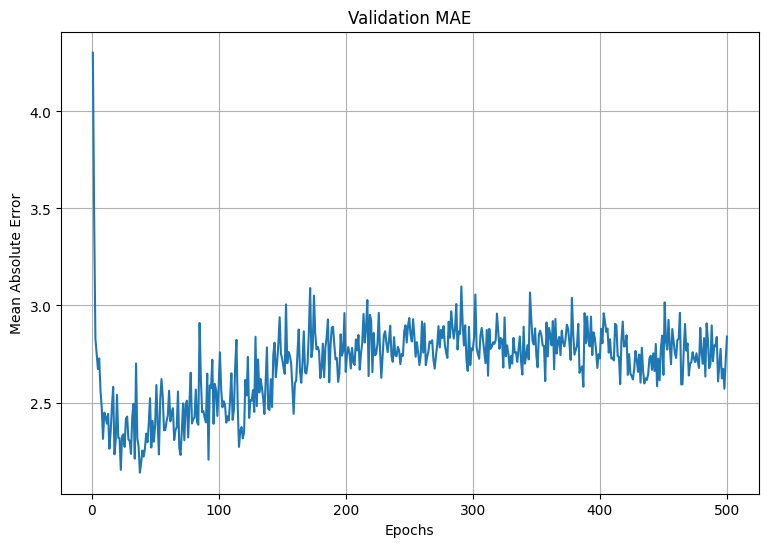

In [13]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

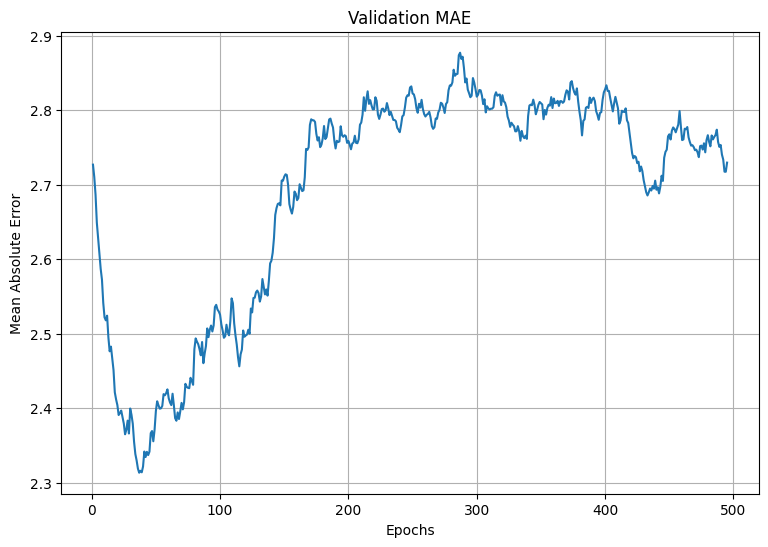

In [14]:
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']
mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9,6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

In [15]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is : ',test_mae_score)

4/4 [==============================] - 0s 5ms/step - loss: 14.7917 - mae: 2.8832
MAE is :  2.883195400238037


In [16]:
from tensorflow.keras import backend as K

K.clear_session()

# Callbacks()

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss='mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_bost.h5',
                     monitor = 'val_mae',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

In [20]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
298/323 [==========================>...] - ETA: 0s - loss: 206.8108 - mae: 10.8168
Epoch 1: val_mae improved from inf to 4.37787, saving model to best_bost.h5
323/323 [==============================] - 2s 3ms/step - loss: 194.4572 - mae: 10.3664 - val_loss: 57.7141 - val_mae: 4.3779
Epoch 2/500
317/323 [============================>.] - ETA: 0s - loss: 31.7681 - mae: 3.8547
Epoch 2: val_mae improved from 4.37787 to 3.45564, saving model to best_bost.h5
323/323 [==============================] - 1s 2ms/step - loss: 31.8606 - mae: 3.8860 - val_loss: 37.2526 - val_mae: 3.4556
Epoch 3/500
318/323 [============================>.] - ETA: 0s - loss: 21.0780 - mae: 3.0607
Epoch 3: val_mae improved from 3.45564 to 3.19479, saving model to best_bost.h5
323/323 [==============================] - 1s 2ms/step - loss: 20.8978 - mae: 3.0534 - val_loss: 28.9255 - val_mae: 3.1948
Epoch 4/500
298/323 [==========================>...] - ETA: 0s - loss: 17.3739 - mae: 2.7255
Epoch 4: val_mae im

In [21]:
!ls -l

total 72
-rw-r--r-- 1 root root 65840 Oct 12 01:17 best_bost.h5
drwxr-xr-x 1 root root  4096 Oct 10 13:28 sample_data


In [23]:
from tensorflow.keras.models import load_model

best_boston = load_model('best_bost.h5')

In [24]:
test_mse_score, test_mae_score = best_boston.evaluate(X_test, y_test, verbose = 0)

print('MAE is :', test_mae_score)

MAE is : 2.3847172260284424
